In [83]:
import pandas as pd
fruit_data = pd.read_csv('./fruits.csv')
fruit_data.head(15)

,mass,width,height,fruit_label
0,192,8.4,7.3,1
1,180,8.0,6.8,1
2,176,7.4,7.2,1
3,86,6.2,4.7,2
4,84,6.0,4.6,2
5,80,5.8,4.3,2
6,80,5.9,4.3,2
7,76,5.8,4.0,2
8,178,7.1,7.8,1
9,172,7.4,7.0,1


In [84]:
atributs = fruit_data[["mass", "width", "height"]].values
type_fruit = fruit_data["fruit_label"].values

print(atributs)
print(type_fruit)

[[192.    8.4   7.3]
 [180.    8.    6.8]
 [176.    7.4   7.2]
 [ 86.    6.2   4.7]
 [ 84.    6.    4.6]
 [ 80.    5.8   4.3]
 [ 80.    5.9   4.3]
 [ 76.    5.8   4. ]
 [178.    7.1   7.8]
 [172.    7.4   7. ]
 [166.    6.9   7.3]
 [172.    7.1   7.6]
 [154.    7.    7.1]
 [342.    9.    9.4]
 [356.    9.2   9.2]
 [362.    9.6   9.2]
 [204.    7.5   9.2]
 [140.    6.7   7.1]
 [160.    7.    7.4]
 [158.    7.1   7.5]
 [210.    7.8   8. ]
 [164.    7.2   7. ]
 [190.    7.5   8.1]
 [142.    7.6   7.8]
 [150.    7.1   7.9]
 [160.    7.1   7.6]
 [154.    7.3   7.3]
 [158.    7.2   7.8]
 [144.    6.8   7.4]
 [154.    7.1   7.5]
 [180.    7.6   8.2]
 [154.    7.2   7.2]
 [176.    7.3   7.5]
 [163.    6.3   7.9]
 [173.    7.5   7.2]
 [151.    7.4   7. ]
 [349.    9.3   9.1]
 [351.    9.5   9.9]
 [360.    9.    9.9]
 [203.    7.4   9. ]]
[1 1 1 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2
 2 2 2]


In [85]:
from sklearn.model_selection import train_test_split

atr_tr, atr_ts, type_tr, type_ts = train_test_split(atributs,type_fruit,test_size=0.2, random_state=42)

In [86]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(atr_tr, type_tr)

type_pred = knn.predict(atr_ts)
print(type_pred)
print(type_ts)

[2 2 2 2 2 2 2 2]
[2 2 2 2 2 1 2 2]


In [87]:
from sklearn.metrics import accuracy_score
accucary = accuracy_score(type_ts, type_pred)
print(accucary)


0.875


In [88]:
y_true = [0,1,0,1,1,0,1,1,1,1]
y_pred = [0,1,0,1,1,0,1,1,1,1]
accucary = accuracy_score(y_true, y_pred)
print(accucary)

1.0


In [89]:
for i in range(1,11):
    k_method = KNeighborsClassifier(n_neighbors = i)
    k_method.fit(atr_tr, type_tr)
    res_pred = knn.predict(atr_ts)
    accuracy = accuracy_score(type_ts, res_pred)
    print(f"Точность предсказание: {accuracy} для {i} ближайщих соседей")

Точность предсказание: 0.875 для 1 ближайщих соседей
Точность предсказание: 0.875 для 2 ближайщих соседей
Точность предсказание: 0.875 для 3 ближайщих соседей
Точность предсказание: 0.875 для 4 ближайщих соседей
Точность предсказание: 0.875 для 5 ближайщих соседей
Точность предсказание: 0.875 для 6 ближайщих соседей
Точность предсказание: 0.875 для 7 ближайщих соседей
Точность предсказание: 0.875 для 8 ближайщих соседей
Точность предсказание: 0.875 для 9 ближайщих соседей
Точность предсказание: 0.875 для 10 ближайщих соседей


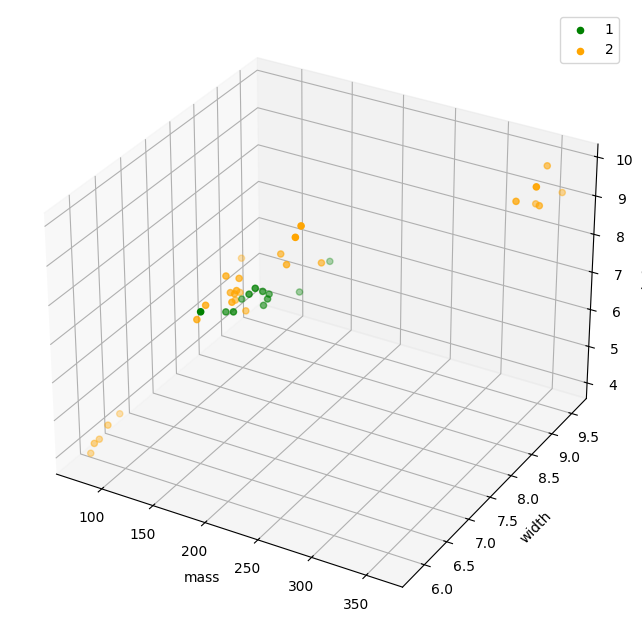

In [90]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = '3d')

for label, color in zip(fruit_data['fruit_label'].unique(), ['green', 'orange']):
    df =  fruit_data[fruit_data['fruit_label'] == label]
    ax.scatter(df['mass'], df['width'], df['height'], c=color, label=label)

ax.set_xlabel('mass')
ax.set_ylabel('width')
ax.set_zlabel('height')

plt.legend()
plt.show()

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(atr_tr, type_tr)
y_pred = rf_clf.predict(atr_ts)
accuracy = accuracy_score(type_ts, y_pred)
print('accuaracy: ', accuracy)

accuaracy:  0.875
